In [1]:
import numpy as np
from matplotlib import pyplot as plt
from itertools import chain
import pandas as pd
import datetime
import time
import os
#import geopy.distance
from math import dist
import sklearn.neighbors

## Process daily csv files

In [3]:
def reshape_yr(year):
    # read the daily csv files, calculate weekly data, save to csv file
    # returns a Pandas multiindexed dataframe
    print("processing "+ str(year))
    filename = os.path.join("./by_year", str(year) + ".csv")
    colnames = ['ID','date','elem','value','M-flag','Q-flag','S-Flag','ObsTime']
    df = pd.read_csv(filename,names=colnames, header=None)
    df.drop(df.columns[4:],axis=1, inplace = True) # remove the flags and obstimes
    df.rename(columns={'value':str(year)},inplace=True)
    df['date'] = pd.to_datetime(df['date'], format='%Y%m%d') # convert date format
    df['day_of_year'] = df['date'].dt.dayofyear
    df['wkk'] = (df['day_of_year']//7)+1
    df = df[["ID","elem","wkk",str(year)]]
    df=df.groupby(["ID","elem","wkk"]).agg({str(year):['sum']})
    #Path = os.path.join("./final_csv", str(year) + ".csv")
    #df.to_csv(Path,index=False)
    # print("dataframe "+str(year)+".csv saved to path ./final_csv")
    return df
'''
# testcode
yrList = ["2012.csv","2014.csv"]
i =1
for yr in yrList:
    year = yr[:4]
    print(year)
    filename="yr"+yr[:4]
    globals()[filename] = reshape_yr(year)
'''

'\nyrList = ["2012.csv","2014.csv"]\ni =1\nfor yr in yrList:\n    year = yr[:4]\n    print(year)\n    filename="yr"+yr[:4]\n    globals()[filename] = reshape_yr(year)\n'

In [23]:
def merge_dfs (df1,df2):
    # merge two dataframes; 
    # used to merge all data from 2000-2021
    merged_df=pd.concat([df1, df2], axis=1)
    return merged_df

In [45]:
# Process all .csv files in a folder and merge into one file
walk_path = "./by_year" # includes yearly csv files from 2000-2021
i = 0 
for (root,dirs,files) in os.walk(walk_path, topdown=True):
    for yr in files:
        print(yr)
        year = yr[:4]
        filename="yr"+year[:4]
        if i == 0:
            #print(filename)
            merged_df = reshape_yr(year)
        else:
            #print(filename)
            globals()[filename] = reshape_yr(year)
            merged_df = merge_dfs(merged_df,globals()[filename])
        i+=1
      

'\nwalk_path = "./by_year"\ni = 0 \nfor (root,dirs,files) in os.walk(walk_path, topdown=True):\n    for yr in files:\n        print(yr)\n        year = yr[:4]\n        filename="yr"+year[:4]\n        if i == 0:\n            #print(filename)\n            merged_df = reshape_yr(year)\n        else:\n            #print(filename)\n            globals()[filename] = reshape_yr(year)\n            merged_df = merge_dfs(merged_df,globals()[filename])\n        i+=1\n'

In [29]:
# Save merged df to csv
Path = os.path.join("./final_csv", str(year) + ".csv") # This includes all yearly csv files from 2000-2021
merged_df.to_csv(Path,index=False)
merged_df.to_pickle("merged_df_ave.pkl") # save as pkl file
merged_df # weekly sum data between 2000-2021 are added together

2007    2016   2003   2012 2021   2008   2017   2004  \
                        sum     sum    sum    sum  sum    sum    sum    sum   
ID          elem wkk                                                          
AE000041196 PRCP 1      0.0     NaN  279.0    0.0  0.0    0.0    NaN    NaN   
                 2      NaN     0.0    NaN    0.0  0.0    NaN    NaN    NaN   
                 3      NaN     NaN    0.0   35.0  0.0   79.0    0.0    NaN   
                 4      0.0     NaN   13.0    0.0  0.0    0.0    NaN  109.0   
                 5      5.0     NaN    NaN    0.0  0.0    0.0   71.0    NaN   
...                     ...     ...    ...    ...  ...    ...    ...    ...   
ZI000067983 TMIN 49   166.0  1221.0  234.0  993.0  NaN    NaN  325.0  827.0   
                 50   163.0   907.0    NaN  991.0  NaN  156.0  887.0  464.0   
                 51   126.0  1099.0    NaN  802.0  NaN  197.0  702.0  457.0   
                 52   479.0   655.0    NaN  838.0  NaN    NaN    NaN  856.0   
                 53   134.0   189.0    NaN  553.0  NaN    NaN    NaN  346.0   

                        2013   2000  ...   2005    2014    2001    2010 2019  \
                         sum    sum  ...    sum     sum     sum     sum  sum   
ID          elem wkk                 ...                                       
AE000041196 PRCP 1       0.0    NaN  ...    NaN     0.0     NaN   124.0  NaN   
                 2       0.0    NaN  ...    NaN    26.0    18.0    10.0  NaN   
                 3       0.0    NaN  ...    5.0     0.0     NaN     0.0  NaN   
                 4       0.0    NaN  ...    NaN    28.0     NaN     0.0  NaN   
                 5     288.0    NaN  ...    NaN    10.0     NaN     0.0  NaN   
...                      ...    ...  ...    ...     ...     ...     ...  ...   
ZI000067983 TMIN 49    956.0  634.0  ...  673.0   918.0   633.0   380.0  NaN   
                 50   1193.0  637.0  ...  466.0   677.0   691.0   357.0  NaN   
                 51   1161.0  830.0  ...  334.0   387.0   643.0   362.0  NaN   
                 52   1225.0  989.0  ...  317.0  1357.0  1089.0  1094.0  NaN   
                 53    381.0  506.0  ...  318.0   365.0   314.0   361.0  NaN   

                        2006   2015    2002   2011   2020  
                         sum    sum     sum    sum    sum  
ID          elem wkk                                       
AE000041196 PRCP 1       NaN    0.0     NaN    0.0    5.0  
                 2       NaN    NaN    48.0    0.0  364.0  
                 3       NaN    NaN    28.0    0.0  114.0  
                 4       NaN    NaN     NaN    0.0    8.0  
                 5       NaN    NaN     NaN    0.0    0.0  
...                      ...    ...     ...    ...    ...  
ZI000067983 TMIN 49    451.0  366.0   422.0  605.0    NaN  
                 50    607.0    NaN   814.0  666.0    NaN  
                 51    884.0  363.0  1037.0  434.0    NaN  
                 52   1057.0  547.0  1175.0  903.0    NaN  
                 53      NaN  346.0   308.0  332.0    NaN  

[14384602 rows x 22 columns]

In [97]:
merged_df2=merged_df.reset_index()
merged_df2['avg'] = merged_df2.mean(axis=1) # Average the weekly data over the years 
merged_df2 

,ID,elem,wkk,2007,2016,2003,2012,2021,2008,2017,...,2014,2001,2010,2019,2006,2015,2002,2011,2020,avg
,,,,sum,sum,sum,sum,sum,sum,sum,...,sum,sum,sum,sum,sum,sum,sum,sum,sum,
0,AE000041196,PRCP,1,0.0,NaN,279.0,0.0,0.0,0.0,NaN,...,0.0,NaN,124.0,NaN,NaN,0.0,NaN,0.0,5.0,34.000000
1,AE000041196,PRCP,2,NaN,0.0,NaN,0.0,0.0,NaN,NaN,...,26.0,18.0,10.0,NaN,NaN,NaN,48.0,0.0,364.0,42.363636
2,AE000041196,PRCP,3,NaN,NaN,0.0,35.0,0.0,79.0,0.0,...,0.0,NaN,0.0,NaN,NaN,NaN,28.0,0.0,114.0,20.461538
3,AE000041196,PRCP,4,0.0,NaN,13.0,0.0,0.0,0.0,NaN,...,28.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,8.0,21.416667
4,AE000041196,PRCP,5,5.0,NaN,NaN,0.0,0.0,0.0,71.0,...,10.0,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,34.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14384597,ZI000067983,TMIN,49,166.0,1221.0,234.0,993.0,NaN,NaN,325.0,...,918.0,633.0,380.0,NaN,451.0,366.0,422.0,605.0,NaN,585.823529
14384598,ZI000067983,TMIN,50,163.0,907.0,NaN,991.0,NaN,156.0,887.0,...,677.0,691.0,357.0,NaN,607.0,NaN,814.0,666.0,NaN,645.066667
14384599,ZI000067983,TMIN,51,126.0,1099.0,NaN,802.0,NaN,197.0,702.0,...,387.0,643.0,362.0,NaN,884.0,363.0,1037.0,434.0,NaN,613.625000


In [43]:
merged_df2.to_csv("merged_df.csv")
merged_df['avg'] = merged_df.mean(axis=1)

In [50]:
#weekly_avg_only = merged_df['avg']
weekly_avg_only.to_pickle("merged_df_avg_only.pkl")
weekly_avg_only # the average data are extracted 

ID           elem  wkk
AE000041196  PRCP  1       34.000000
                   2       42.363636
                   3       20.461538
                   4       21.416667
                   5       34.000000
                             ...    
ZI000067983  TMIN  49     585.823529
                   50     645.066667
                   51     613.625000
                   52     898.642857
                   53     342.538462
Name: avg, Length: 14384602, dtype: float64

In [56]:
weekly_avg_only2 = weekly_avg_only.reset_index()
Path = os.path.join("./weekly_avg_only.csv")
weekly_avg_only2.to_csv(Path,index=False)
weekly_avg_only2 # index reseted

,ID,elem,wkk,avg
0,AE000041196,PRCP,1,34.000000
1,AE000041196,PRCP,2,42.363636
2,AE000041196,PRCP,3,20.461538
3,AE000041196,PRCP,4,21.416667
4,AE000041196,PRCP,5,34.000000
...,...,...,...,...
14384597,ZI000067983,TMIN,49,585.823529
14384598,ZI000067983,TMIN,50,645.066667
14384599,ZI000067983,TMIN,51,613.625000
14384600,ZI000067983,TMIN,52,898.642857


In [83]:
PRCP = weekly_avg_only2.loc[weekly_avg_only2['elem'] == "PRCP"]
PRCP.rename(columns={"avg":"PRCP"},inplace=True)
PRCP2= PRCP[["ID","wkk","PRCP"]]
Path = os.path.join("./PRCP.csv")
PRCP2.to_csv(Path,index=False)
PRCP2

,ID,wkk,PRCP
0,AE000041196,1,34.000000
1,AE000041196,2,42.363636
2,AE000041196,3,20.461538
3,AE000041196,4,21.416667
4,AE000041196,5,34.000000
...,...,...,...
14384438,ZI000067983,49,202.692308
14384439,ZI000067983,50,281.857143
14384440,ZI000067983,51,255.923077
14384441,ZI000067983,52,303.461538


In [114]:
# extract individule element/feature and reshape the table so that the week numbers are collumn names
PRCP = weekly_avg_only2.loc[weekly_avg_only2['elem'] == "PRCP"]
PRCP.rename(columns={"avg":"PRCP"},inplace=True)
PRCP2= PRCP[["ID","wkk","PRCP"]]
PRCP_pivot=pd.pivot_table(PRCP2,index = ["ID"],columns=["wkk"],values = "PRCP")
PRCP_pivot = PRCP_pivot.reset_index()
Path = os.path.join("./PRCP_pivot.csv")
PRCP_pivot.to_csv(Path,index=False)
PRCP_pivot

/share/apps/rc/software/Anaconda3/2020.11/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


wkk,ID,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,AE000041196,34.000000,42.363636,20.461538,21.416667,34.000000,5.454545,2.333333,17.000000,32.200000,...,3.272727,37.250000,0.000000,10.444444,47.923077,78.363636,95.800000,16.416667,29.090909,0.000000
1,AEM00041194,6.777778,62.450000,85.777778,16.111111,4.222222,6.833333,5.166667,20.263158,32.684211,...,0.375000,0.764706,18.411765,20.470588,12.294118,61.411765,44.277778,18.894737,18.333333,7.611111
2,AEM00041217,0.000000,94.714286,195.000000,20.333333,10.000000,8.333333,0.000000,26.333333,76.166667,...,NaN,5.000000,NaN,25.000000,2.666667,12.666667,195.333333,11.600000,25.000000,36.000000
3,AEM00041218,NaN,388.666667,98.600000,115.500000,16.500000,24.666667,1.000000,84.000000,36.200000,...,NaN,NaN,NaN,36.000000,NaN,8.000000,681.000000,5.000000,NaN,NaN
4,AFM00040938,232.500000,495.500000,45.500000,718.500000,335.666667,923.500000,560.000000,57.333333,89.500000,...,517.666667,0.000000,8.333333,449.500000,190.500000,495.000000,145.333333,76.000000,731.500000,20.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75104,ZA000067743,149.800000,320.428571,158.400000,38.000000,225.400000,142.500000,63.000000,113.400000,25.857143,...,6.666667,20.571429,0.000000,16.200000,154.857143,120.200000,42.777778,127.750000,124.600000,35.500000
75105,ZAM00067663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,320.000000,NaN,NaN,NaN,NaN,NaN
75106,ZI000067775,376.352941,345.500000,302.888889,251.050000,306.263158,219.789474,289.833333,297.666667,422.352941,...,105.916667,112.736842,149.133333,221.388889,286.888889,257.529412,385.842105,555.500000,546.312500,189.250000
75107,ZI000067975,121.466667,242.461538,273.444444,245.125000,281.733333,270.000000,152.705882,405.529412,274.500000,...,133.166667,163.625000,75.000000,250.222222,161.736842,323.666667,384.588235,249.470588,220.600000,178.133333


In [94]:
# average temperature 
TAVG = weekly_avg_only2.loc[weekly_avg_only2['elem'] == "TAVG"]
TAVG.rename(columns={"avg":"TAVG"},inplace=True)
TAVG2= TAVG[["ID","wkk","TAVG"]]
TAVG_pivot=pd.pivot_table(TAVG2,index = ["ID"],columns=["wkk"],values = "TAVG")
TAVG_pivot = TAVG_pivot.reset_index()
Path = os.path.join("./TAVG_pivot.csv")
TAVG_pivot.to_csv(Path,index=False)
TAVG_pivot

/share/apps/rc/software/Anaconda3/2020.11/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


wkk,ID,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,AE000041196,1161.227273,1328.772727,1282.227273,1291.409091,1343.000000,1331.909091,1407.863636,1456.181818,1523.409091,...,1929.681818,1837.363636,1743.818182,1676.454545,1608.863636,1544.363636,1494.181818,1424.000000,1394.136364,432.227273
1,AEM00041194,1247.227273,1444.090909,1382.318182,1388.727273,1429.181818,1431.090909,1498.045455,1538.409091,1592.045455,...,2044.272727,1946.636364,1863.454545,1779.227273,1705.136364,1652.681818,1599.181818,1534.727273,1496.409091,470.909091
2,AEM00041217,1182.909091,1377.954545,1316.909091,1326.181818,1378.181818,1370.136364,1451.409091,1490.363636,1557.772727,...,1982.136364,1892.454545,1795.636364,1719.227273,1648.272727,1584.363636,1531.409091,1458.181818,1421.272727,445.272727
3,AEM00041218,1145.181818,1318.454545,1244.409091,1282.363636,1338.363636,1347.409091,1450.000000,1503.500000,1567.318182,...,1981.500000,1863.181818,1762.454545,1665.045455,1588.818182,1544.090909,1464.818182,1397.954545,1357.318182,429.636364
4,AFM00040938,323.687500,301.187500,279.125000,394.000000,483.437500,433.562500,513.687500,628.875000,702.750000,...,961.666667,889.200000,747.066667,641.312500,525.062500,592.687500,411.125000,407.687500,391.812500,94.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8806,ZA000067743,689.636364,571.714286,657.625000,687.250000,682.333333,752.222222,696.909091,720.461538,770.090909,...,806.000000,816.357143,659.250000,554.750000,753.571429,916.076923,637.357143,819.777778,897.333333,386.714286
8807,ZAM00067663,NaN,NaN,230.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,250.000000,NaN,NaN,NaN,261.000000,NaN
8808,ZI000067775,1286.000000,1390.250000,1378.047619,1425.454545,1361.500000,1386.590909,1308.454545,1391.476190,1450.666667,...,1495.636364,1516.952381,1521.333333,1491.142857,1432.227273,1467.714286,1406.300000,1466.850000,1454.300000,466.050000
8809,ZI000067975,1177.555556,1300.600000,1227.700000,1290.000000,1312.055556,1411.388889,1390.631579,1307.736842,1381.315789,...,1252.050000,1355.631579,1205.250000,1453.263158,1406.100000,1252.850000,1307.444444,1267.157895,1393.470588,458.647059


## Station query

In [146]:
# convert station list to array
# there should be better ways but I didn't find any...
rows, cols = (119503, 9)
Stations= [[0 for i in range(cols)] for j in range(rows)]
with open("./ghcnd-stations.txt") as f:
    s = f.readlines()
i = 0
for station in s:
    Stations[i][0]=station[:11] #ID
    Stations[i][1]=float(station[12:20]) # Latitude
    Stations[i][2]=float(station[21:30]) # Lontitude
    Stations[i][3]=float(station[31:37]) # Elevatioin
    Stations[i][4]=station[38:40].strip() # state
    Stations[i][5]=station[41:71].strip() # name
    Stations[i][6]=station[72:75].strip() # GSN flag
    Stations[i][7]=station[76:79].strip() # HCN/CRN flag
    WMO = station[80:85].strip()
    if len(WMO)>0:
        Stations[i][8]=int(WMO) # WMO ID
    else:
        Stations[i][8]=""
    i +=1


In [147]:
# Station_df as the station dataframe

cols = ["stationID","Latitude","Longtitude","Elevation","State","Name","GSN","HCN/CRN","WMO"]
Station_df = pd.DataFrame (Stations, columns = cols)
Station_df.set_index('stationID')
#Station_df.style.set_properties(subset="Name",**{'text-align': 'left'})
Station_df.head()

,stationID,Latitude,Longtitude,Elevation,State,Name,GSN,HCN/CRN,WMO
0,ACW00011604,17.1167,-61.7833,10.1,,ST JOHNS COOLIDGE FLD,,,
1,ACW00011647,17.1333,-61.7833,19.2,,ST JOHNS,,,
2,AE000041196,25.3330,55.5170,34.0,,SHARJAH INTER. AIRP,GSN,,41196
3,AEM00041194,25.2550,55.3640,10.4,,DUBAI INTL,,,41194
4,AEM00041217,24.4330,54.6510,26.8,,ABU DHABI INTL,,,41217


In [161]:
# find all Stations in a state
StateName = "AL"
selected_stations=Station_df.query('State==@StateName')
selected_stations

,stationID,Latitude,Longtitude,Elevation,State,Name,GSN,HCN/CRN,WMO
54077,US1ALAT0002,32.4756,-86.4393,106.1,AL,PRATTVILLE 1.1 NNE,,,
54078,US1ALAT0010,32.4262,-86.5390,95.1,AL,PRATTVILLE 5.9 WSW,,,
54079,US1ALAT0013,32.6444,-86.4302,268.2,AL,DEATSVILLE 3.4 NW,,,
54080,US1ALAT0014,32.4825,-86.4854,100.3,AL,PRATTVILLE 2.7 WNW,,,
54081,US1ALBB0003,33.0212,-86.9208,141.1,AL,WILTON 4.8 SSW,,,
...,...,...,...,...,...,...,...,...,...
118334,USW00073802,31.9156,-86.3114,187.1,AL,HIGHLAND HOME 2 S,,,
118335,USW00073803,33.5722,-86.0572,160.0,AL,TALLADEGA 10 NNE,,,
118464,USW00093806,33.2119,-87.6161,45.7,AL,TUSCALOOSA MUNI AP,,HCN,
118481,USW00093826,30.4000,-87.6000,21.9,AL,BARIN FLD NAAS,,,


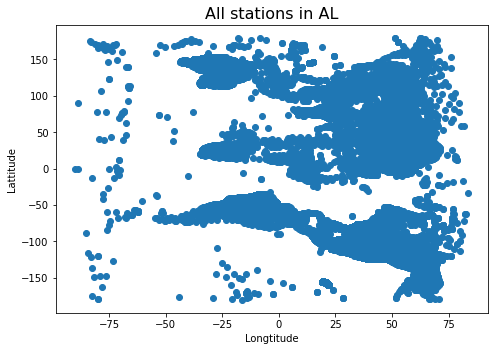

In [162]:
# plot selected stations with coordinates
selected_stations=Station_df # The final run includes all the stations world wide
Lat = selected_stations["Latitude"].to_numpy()
Long = selected_stations["Longtitude"].to_numpy()
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(Lat,Long)
ax.set_ylabel("Lattitude")
ax.set_xlabel("Longtitude")
ax.set_title('All stations in ' +str(StateName), fontsize=16)
plt.savefig('ALstations.png', transparent=True)
plt.show() # Note: We changed the code in the final run so the stations in this plot are worldwide instead of AL only

In [163]:
# calculate distance between stations

Stations_A = selected_stations.iloc[:,:3]
Stations_B = Stations_A.copy()
Stations_B = Stations_B.rename(columns={"stationID": "stationID_B","Latitude": "Latitude_B","Longtitude": "Longtitude_B"})
#df.rename(columns={"A": "a", "B": "c"})
Stations_A, Stations_B

(          stationID  Latitude  Longtitude
 0       ACW00011604   17.1167    -61.7833
 1       ACW00011647   17.1333    -61.7833
 2       AE000041196   25.3330     55.5170
 3       AEM00041194   25.2550     55.3640
 4       AEM00041217   24.4330     54.6510
 ...             ...       ...         ...
 119498  ZI000067969  -21.0500     29.3670
 119499  ZI000067975  -20.0670     30.8670
 119500  ZI000067977  -21.0170     31.5830
 119501  ZI000067983  -20.2000     32.6160
 119502  ZI000067991  -22.2170     30.0000
 
 [119503 rows x 3 columns],
         stationID_B  Latitude_B  Longtitude_B
 0       ACW00011604     17.1167      -61.7833
 1       ACW00011647     17.1333      -61.7833
 2       AE000041196     25.3330       55.5170
 3       AEM00041194     25.2550       55.3640
 4       AEM00041217     24.4330       54.6510
 ...             ...         ...           ...
 119498  ZI000067969    -21.0500       29.3670
 119499  ZI000067975    -20.0670       30.8670
 119500  ZI000067977    -21.017

In [164]:
# add columns with radians for latitude and longitude
Stations_A[['lat_radians_A','long_radians_A']] = (
    np.radians(Stations_A.loc[:,['Latitude','Longtitude']])
)
Stations_B[['lat_radians_B','long_radians_B']] = (
    np.radians(Stations_B.loc[:,['Latitude_B','Longtitude_B']])
)


In [165]:
Stations_A, Stations_B

(          stationID  Latitude  Longtitude  lat_radians_A  long_radians_A
 0       ACW00011604   17.1167    -61.7833       0.298743       -1.078322
 1       ACW00011647   17.1333    -61.7833       0.299032       -1.078322
 2       AE000041196   25.3330     55.5170       0.442144        0.968954
 3       AEM00041194   25.2550     55.3640       0.440783        0.966284
 4       AEM00041217   24.4330     54.6510       0.426436        0.953840
 ...             ...       ...         ...            ...             ...
 119498  ZI000067969  -21.0500     29.3670      -0.367392        0.512551
 119499  ZI000067975  -20.0670     30.8670      -0.350235        0.538731
 119500  ZI000067977  -21.0170     31.5830      -0.366816        0.551227
 119501  ZI000067983  -20.2000     32.6160      -0.352557        0.569257
 119502  ZI000067991  -22.2170     30.0000      -0.387760        0.523599
 
 [119503 rows x 5 columns],
         stationID_B  Latitude_B  Longtitude_B  lat_radians_B  long_radians_B
 0  

In [166]:
dist = sklearn.neighbors.DistanceMetric.get_metric('haversine')
dist_matrix = (dist.pairwise
    (Stations_B[['lat_radians_B','long_radians_B']],
     Stations_A[['lat_radians_A','long_radians_A']])*3959
)
# Note that 3959 is the radius of the earth in miles
df_dist_matrix = (
    pd.DataFrame(dist_matrix,index=Stations_B['stationID_B'], 
                 columns=Stations_A['stationID'])
)



In [18]:
df_dist_matrix

stationID,US1ALAT0002,US1ALAT0010,US1ALAT0013,US1ALAT0014,US1ALBB0003,US1ALBB0004,US1ALBB0005,US1ALBB0006,US1ALBB0008,US1ALBL0002,...,USW00063895,USW00063896,USW00063897,USW00063899,USW00073801,USW00073802,USW00073803,USW00093806,USW00093826,USW00093843
stationID_B,,,,,,,,,,,,,,,,,,,,,
US1ALAT0002,0.000000,6.741372,11.675706,2.729132,46.949510,46.992262,64.238967,46.605456,51.722168,102.429219,...,155.069091,155.373740,32.927256,98.722593,84.057565,39.410724,78.939591,85.178256,158.903519,104.183758
US1ALAT0010,6.741372,0.000000,16.355076,4.990035,46.721132,46.733770,63.368117,46.703075,50.253782,105.664407,...,155.514658,159.759298,26.414895,93.508834,81.769974,37.709042,83.963663,82.820304,153.347032,104.915779
US1ALAT0013,11.675706,16.355076,0.000000,11.639597,38.590240,38.671705,56.330979,37.833577,44.978302,90.824592,...,145.123770,143.783018,38.453080,109.832496,77.950512,50.834281,67.646019,79.171058,169.696443,113.681932
US1ALAT0014,2.729132,4.990035,11.639597,0.000000,45.008135,45.042243,62.145442,44.760515,49.463272,101.829992,...,153.407029,155.358574,30.522824,98.217259,81.646978,40.471051,79.276445,82.754086,158.185064,106.126500
US1ALBB0003,46.949510,46.721132,38.590240,45.008135,0.000000,0.211241,17.785686,2.267789,9.971111,68.106891,...,108.875567,127.107718,47.533781,129.867157,40.998989,84.250212,62.746853,42.341836,185.465202,151.119577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
USW00073802,39.410724,37.709042,50.834281,40.471051,84.250212,84.250254,100.359960,84.340602,86.834002,141.588555,...,193.122251,192.836134,48.622610,68.819849,116.559520,0.000000,115.416336,117.453025,129.506988,69.962100
USW00073803,78.939591,83.963663,67.646019,79.276445,62.746853,62.953160,69.516204,60.522072,71.954441,38.506062,...,112.575808,77.597206,100.806239,177.471574,91.931991,115.416336,0.000000,93.315997,237.098592,165.659116
USW00093806,85.178256,82.820304,79.171058,82.754086,42.341836,42.188822,26.181934,43.976274,34.256614,80.302405,...,85.968648,138.103150,71.014667,146.581737,1.428517,117.453025,93.315997,0.000000,194.297799,186.997674


In [19]:
# Unpivot this dataframe from wide format to long format.
# When you unpivot, the data in the pivot table becomes a
# column named 'value'. Rename this column to 'miles' for clarity.
df_dist_long = (
    pd.melt(df_dist_matrix.reset_index(),id_vars='stationID_B')
)
df_dist_long = df_dist_long.rename(columns={'value':'miles'})
df_dist_long = df_dist_long[['stationID','stationID_B',"miles"]]
df_dist_long2 = df_dist_long.set_index(['stationID', 'stationID_B'])
df_dist_long2

miles
stationID   stationID_B            
US1ALAT0002 US1ALAT0002    0.000000
            US1ALAT0010    6.741372
            US1ALAT0013   11.675706
            US1ALAT0014    2.729132
            US1ALBB0003   46.949510
...                             ...
USW00093843 USW00073802   69.962100
            USW00073803  165.659116
            USW00093806  186.997674
            USW00093826  140.875703
            USW00093843    0.000000

[1050625 rows x 1 columns]